## Cluster analysis

In [ ]:
from sklearn.datasets import load_wine

wine = load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [ ]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
import pandas as pd

df = pd.DataFrame(wine.data, columns=wine.feature_names)

In [ ]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
from sklearn.cluster import KMeans

# モデルの生成
model = KMeans(n_clusters=3, init='random', random_state=0)

# クラスタリングを実行
y_pred = model.fit_predict(df)

In [ ]:
y_pred

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0], dtype=int32)

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'alcohol' and 'malic_acid' are relevant features
sns.scatterplot(data=df_cluster, x='alcohol', y='malic_acid', s=60,
                hue='cluster', palette=sns.color_palette('muted', 3))

# セントロイドのプロット
centroids = model.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', color='k', label='centroid')

plt.legend()
plt.grid()
plt.show()

NameError: name 'df_cluster' is not defined

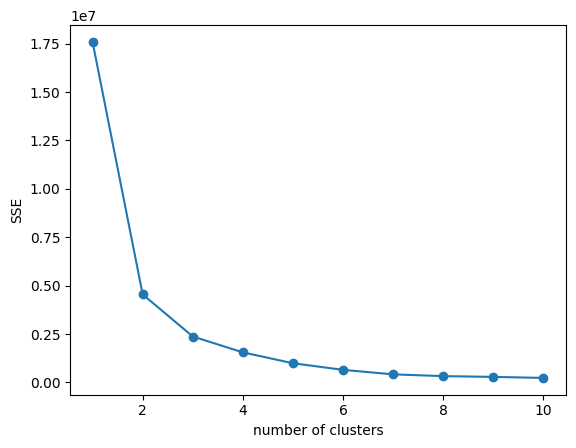

In [ ]:
# クラスタリング実行
cluster_range = range(1, 11)
SSEs = []
for i in cluster_range:
    model_tmp = KMeans(n_clusters=i, init='k-means++', random_state=0)
    model_tmp.fit(df)
    # SSEの取得
    SSEs.append(model_tmp.inertia_)

# グラフにプロット
plt.plot(cluster_range, SSEs, marker='o')
plt.xlabel('number of clusters')
plt.ylabel('SSE')
plt.show()

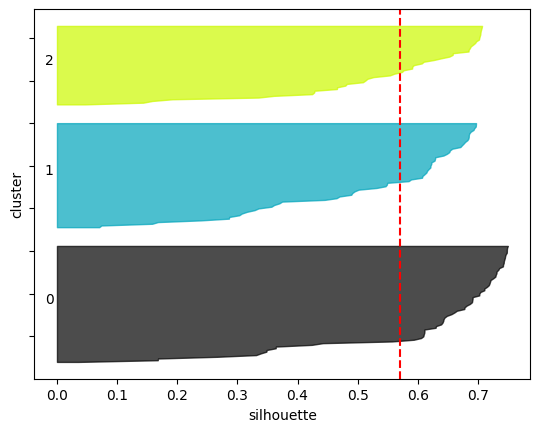

In [ ]:
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

# クラスター数
n_clusters = 3
# クラスターラベル
cluster_labels = y_pred

# シルエット係数の平均値を計算
silhouette_avg = silhouette_score(df, cluster_labels)
# 各データのシルエット係数を計算
sample_silhouette_values = silhouette_samples(df, cluster_labels)

# シルエット図の描画
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    plt.text(-0.02, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

# 平均線の描画
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.tick_params(labelleft=False)
plt.xlabel('silhouette')
plt.ylabel('cluster')
plt.show()